<a href="https://colab.research.google.com/github/ido177/colab/blob/main/udemy/cov19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
#visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
!ls -l /content

total 16
-rw-r--r-- 1 root root 11492 Aug 29 12:34 covid_19_data.csv
drwxr-xr-x 1 root root  4096 Aug 25 13:35 sample_data


In [9]:
!gdown --id 1lBrSStDNcPPm1wrGqReCat_f2uSFfKG6

Downloading...
From: https://drive.google.com/uc?id=1lBrSStDNcPPm1wrGqReCat_f2uSFfKG6
To: /content/covid_19_data.csv
100% 11.5k/11.5k [00:00<00:00, 28.4MB/s]


In [11]:
df = pd.read_csv(r"/content/covid_19_data.csv")

In [12]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [13]:
df.shape

(321, 6)

In [14]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [15]:
df.isnull()

,Date,State,Region,Confirmed,Deaths,Recovered
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
316,False,False,False,False,False,False
317,False,False,False,False,False,False
318,False,False,False,False,False,False
319,False,False,False,False,False,False


In [16]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

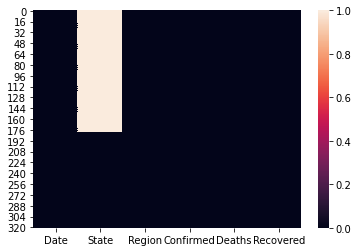

In [21]:
sns.heatmap(df.isnull())
plt.show()

# Q1

Show the number of confirmed, deaths and recovered cases in each region.

each, use groupby function.

In [22]:
df.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702


In [25]:
df.groupby('Region').sum().head(5)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7


In [26]:
df.groupby('Region')['Confirmed', 'Recovered'].sum().head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7


# Q2

In which region max num of confirmed cases were recorded


In [40]:
#df.groupby('Region')['Confirmed', 'Deaths].sum().sort_values(ascending=False)  # ascending = sorting type
df.groupby('Region').Deaths.sum().sort_values(ascending=False)
# df[df.Region == 'Pakistan']

Region
US            60967
Italy         27682
UK            26166
Spain         24275
France        24121
              ...  
Fiji              0
Cambodia          0
Mozambique        0
Mongolia          0
Laos              0
Name: Deaths, Length: 187, dtype: int64

In [42]:
df.groupby('Region')['Confirmed', 'Deaths'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths
Region,,
Afghanistan,1939,60
Albania,766,30
Algeria,3848,444
Andorra,743,42
Angola,27,2
...,...,...
West Bank and Gaza,344,2
Western Sahara,6,0
Yemen,6,0


# Q5

Remove all the records where confirmed cases are less than 10

In [43]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [44]:
df.Confirmed < 10

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Name: Confirmed, Length: 321, dtype: bool

In [53]:
df[~(df.Confirmed < 10)]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [46]:
df[~(df.Confirmed < 10)] # ~ - removes rows 

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [54]:
df = df[~(df.Confirmed < 10)]

In [55]:
df[df.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered


In [56]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
